In [19]:
#импортируем пакеты
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import math
import scipy.stats as ss
import seaborn as sns
from datetime import datetime, date, time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
import pylab as pl


In [2]:
#читаем данные с csv
df = pd.read_csv(r"C:\Users\rb066152\Desktop\globalterrorismdb_0718dist.csv", encoding='latin1', error_bad_lines = False, warn_bad_lines = False, low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
#создаем набор из указанных полей
features = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude']
df = df.loc[:,features]
df = df.dropna().reset_index(drop=True) 
df = df.loc[(df['iyear'].isin(list(range(0, 2019)))) & (df['imonth'].isin(list(range(1, 12)))) & (df['iday'].isin(list(range(1, 31))))]

#добавляем новый столбец, склеиный из других
df.loc[:,'accident_date'] = pd.to_datetime(df.astype('str').loc[:,'iyear'] + df.astype('str').loc[:,'imonth'] + df.astype('str').loc[:,'iday'], format='%Y%m%d', errors='ignore')
df

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
5,1970,1,1,United States,North America,37.005105,-89.176269,1970-01-01
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
7,1970,1,2,United States,North America,37.791927,-122.225906,1970-01-02
8,1970,1,2,United States,North America,43.076592,-89.412488,1970-01-02
9,1970,1,3,United States,North America,43.072950,-89.386694,1970-01-03
10,1970,1,1,United States,North America,43.468500,-89.744299,1970-01-01
11,1970,1,6,United States,North America,39.758968,-104.876305,1970-01-06
12,1970,1,8,Italy,Western Europe,41.890961,12.490069,1970-01-08
13,1970,1,9,United States,North America,42.331685,-83.047924,1970-01-09


In [4]:
#создаем таблицу частот общего кол-ва терактов от страны
freq = df[['country_txt','latitude']].groupby(['country_txt']).count() 
freq = pd.DataFrame(freq.sort_values(by='latitude', ascending=True))
freq.head()

val = freq.drop_duplicates() 
mean_val = int(val.mean(axis = 0)) 
var_val = int((val.max(axis = 0)-val.min(axis = 0))*0.1) 
countries = []

In [5]:
# условие 1: с величиной которая стоит в первых и последних 10% 
min_i = int(val.shape[0]*0.1) 
max_i = int(val.shape[0]*0.9) 
df21 = freq.iloc[:min_i,:] 
df22 = freq.iloc[max_i:,:] 

countries = list(df21.index.values) + list(df22.index.values)
countries

['St. Kitts and Nevis',
 'Dominica',
 'South Vietnam',
 'Vatican City',
 'South Yemen',
 'International',
 'New Hebrides',
 'Equatorial Guinea',
 'Wallis and Futuna',
 'Antigua and Barbuda',
 'Falkland Islands',
 'Turkmenistan',
 'Vanuatu',
 'Panama',
 'Namibia',
 'Cyprus',
 'Belgium',
 'Rwanda',
 'Niger',
 'Bosnia-Herzegovina',
 'Ethiopia',
 'Tajikistan',
 'Kosovo',
 'Cambodia',
 'Bahrain',
 'Yugoslavia',
 'Ecuador',
 'Haiti',
 'Georgia',
 'South Sudan',
 'China',
 'Brazil',
 'Central African Republic',
 'Venezuela',
 'Ireland',
 'Bolivia',
 'Cameroon',
 'Honduras',
 'Mozambique',
 'Saudi Arabia',
 'Japan',
 'Uganda',
 'Angola',
 'West Germany (FRG)',
 'Mexico',
 'Myanmar',
 'Mali',
 'Burundi',
 'Kenya',
 'Iran',
 'Germany',
 'Indonesia',
 'Democratic Republic of the Congo',
 'Argentina',
 'Sudan',
 'Nepal',
 'Greece',
 'Italy',
 'Bangladesh',
 'Nicaragua',
 'Ukraine',
 'Guatemala',
 'South Africa',
 'Israel',
 'West Bank and Gaza Strip',
 'Syria',
 'Russia',
 'Libya',
 'Chile',
 'Leb

In [6]:
val.head()

,latitude
country_txt,
St. Kitts and Nevis,1
Turkmenistan,2
People's Republic of the Congo,3
Montenegro,4
Bahamas,5


In [7]:
val2 = val.copy()
val2['prev_val'] = val2['latitude']
val2

,latitude,prev_val
country_txt,,
St. Kitts and Nevis,1,1
Turkmenistan,2,2
People's Republic of the Congo,3,3
Montenegro,4,4
Bahamas,5,5
Slovenia,6,6
Gabon,7,7
East Timor,8,8
Guinea-Bissau,9,9


In [8]:
#Условие 2: Наполняем датафрейм
val21 = val2.loc[val2['latitude'] < mean_val].copy()
for i in range(0, len(val21)-1):
    val21.iloc[i, 1] = val21.iloc[i+1, 0]
    
val22 = val2.loc[val2['latitude'] > mean_val].copy() 
for i in range(1, len(val22)):
    val22.iloc[i, 1] = val22.iloc[i-1, 0]

In [9]:
val2 = val21.append(val22)
newlist = list(val2.loc[abs(val2['latitude']-val2['prev_val']) > var_val].index.values) #берем страны с разбросом больще 10%
countries = countries + newlist 
val2

,latitude,prev_val
country_txt,,
St. Kitts and Nevis,1,2
Turkmenistan,2,3
People's Republic of the Congo,3,4
Montenegro,4,5
Bahamas,5,6
Slovenia,6,7
Gabon,7,8
East Timor,8,9
Guinea-Bissau,9,11


In [10]:
#условие 3: больше 5
newlist = list(freq[(freq['latitude'] < 5)].index.values) #берем страны у которых террактов меньше 5
countries = countries + newlist #добавляем страны в список
newlist

['St. Kitts and Nevis',
 'Dominica',
 'South Vietnam',
 'Vatican City',
 'South Yemen',
 'International',
 'New Hebrides',
 'Equatorial Guinea',
 'Wallis and Futuna',
 'Antigua and Barbuda',
 'Falkland Islands',
 'Turkmenistan',
 'Vanuatu',
 'Mauritius',
 'Seychelles',
 "People's Republic of the Congo",
 'Iceland',
 'Bhutan',
 'French Polynesia',
 'Barbados',
 'Western Sahara',
 'Gambia',
 'Montenegro',
 'Solomon Islands',
 'Grenada',
 'Eritrea',
 'Romania',
 'North Yemen']

In [11]:
df2 = df.loc[~df['country_txt'].isin(list(set(countries)))] 
df2

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
15,1970,1,10,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970-01-10
20,1970,1,15,Uruguay,South America,-34.891151,-56.187214,1970-11-05
33,1970,1,28,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970-12-08
79,1970,2,21,Switzerland,Western Europe,47.368650,8.539182,1970-02-21
94,1970,2,28,Jordan,Middle East & North Africa,31.530243,35.094162,1970-02-28
148,1970,3,24,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-03-24
191,1970,4,15,Jordan,Middle East & North Africa,31.950001,35.933331,1970-04-15
236,1970,4,28,East Germany (GDR),Eastern Europe,52.501530,13.401851,1970-04-28


In [12]:
#данные для графика
graf = df2[['imonth','latitude']].groupby(['imonth']).count()
graf['x'] = list(range(1,len(graf)+1))
graf

,latitude,x
imonth,,
1,307,1
2,311,2
3,318,3
4,340,4
5,354,5
6,326,6
7,352,7
8,354,8
9,359,9


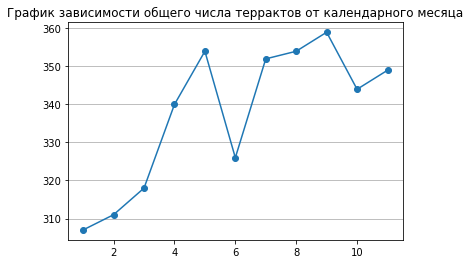

In [13]:
#делаем график
plt.plot(graf['x'], graf['latitude'], marker='o')
plt.title('График зависимости общего числа террактов от календарного месяца')
plt.grid(axis='y')
plt.show()

In [14]:
#коэффициент корреляции Пирсона
np.corrcoef(graf['x'], graf['latitude'])

df.head()

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
5,1970,1,1,United States,North America,37.005105,-89.176269,1970-01-01
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
7,1970,1,2,United States,North America,37.791927,-122.225906,1970-01-02
8,1970,1,2,United States,North America,43.076592,-89.412488,1970-01-02


In [15]:
df

,iyear,imonth,iday,country_txt,region_txt,latitude,longitude,accident_date
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,1970-07-02
5,1970,1,1,United States,North America,37.005105,-89.176269,1970-01-01
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,1970-01-02
7,1970,1,2,United States,North America,37.791927,-122.225906,1970-01-02
8,1970,1,2,United States,North America,43.076592,-89.412488,1970-01-02
9,1970,1,3,United States,North America,43.072950,-89.386694,1970-01-03
10,1970,1,1,United States,North America,43.468500,-89.744299,1970-01-01
11,1970,1,6,United States,North America,39.758968,-104.876305,1970-01-06
12,1970,1,8,Italy,Western Europe,41.890961,12.490069,1970-01-08
13,1970,1,9,United States,North America,42.331685,-83.047924,1970-01-09


In [16]:
data = ['latitude','longitude']
df = df.loc[:, data]
#len_pr = df.shape[0]
df.head(10)

,latitude,longitude
0,18.456792,-69.951164
5,37.005105,-89.176269
6,-34.891151,-56.187214
7,37.791927,-122.225906
8,43.076592,-89.412488
9,43.072950,-89.386694
10,43.468500,-89.744299
11,39.758968,-104.876305
12,41.890961,12.490069
13,42.331685,-83.047924


In [17]:
y = df[['longitude']]
x = df[['latitude']]

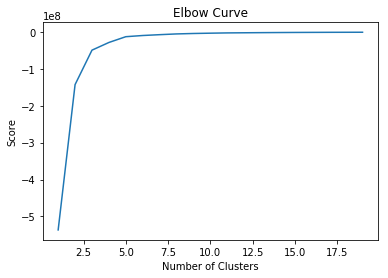

In [20]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.show()



In [21]:
pca = PCA(n_components=1).fit(y)

pca_d = pca.transform(y)
pca_c = pca.transform(x)

kmeans=KMeans(n_clusters=3, random_state=17)
kmeansoutput=kmeans.fit(y)
kmeansoutput

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
df['kmeans'] = kmeans.labels_
print(df)

         latitude   longitude  kmeans
0       18.456792  -69.951164       1
5       37.005105  -89.176269       1
6      -34.891151  -56.187214       1
7       37.791927 -122.225906       1
8       43.076592  -89.412488       1
9       43.072950  -89.386694       1
10      43.468500  -89.744299       1
11      39.758968 -104.876305       1
12      41.890961   12.490069       0
13      42.331685  -83.047924       1
14      18.386932  -66.061127       1
15      52.501530   13.401851       0
16      40.697132  -73.931351       1
17      18.379998  -65.830948       1
18      47.610786 -122.331306       1
19      40.116748  -88.239270       1
20     -34.891151  -56.187214       1
21      47.610786 -122.331306       1
22      47.610786 -122.331306       1
23      40.717892  -74.067467       1
24      14.622869  -90.529068       1
25      14.674280  121.057495       2
26      10.482834  -66.962128       1
27      42.470310  -96.413949       1
28      33.606510  -88.650419       1
29      40.6

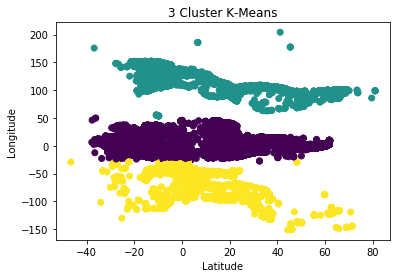

In [22]:
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Latitude')
pl.ylabel('Longitude')
pl.title('3 Cluster K-Means')
pl.show()

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(y)
y_kmeans = kmeans.predict(y)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: unhashable type: 'slice'

In [34]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], s=50);

array([[  8.36856841e-01,   2.13635938e+00],
       [ -1.41365810e+00,   7.40962324e+00],
       [  1.15521298e+00,   5.09961887e+00],
       [ -1.01861632e+00,   7.81491465e+00],
       [  1.27135141e+00,   1.89254207e+00],
       [  3.43761754e+00,   2.61654166e-01],
       [ -1.80822253e+00,   1.59701749e+00],
       [  1.41372442e+00,   4.38117707e+00],
       [ -2.04932168e-01,   8.43209665e+00],
       [ -7.11099611e-01,   8.66043846e+00],
       [ -1.71237268e+00,   2.77780226e+00],
       [ -2.67000792e+00,   8.35389140e+00],
       [  1.24258802e+00,   4.50399192e+00],
       [ -2.22783649e+00,   6.89479938e+00],
       [  1.45513831e+00,  -2.91989981e-02],
       [  4.53791789e-01,   3.95647753e+00],
       [  1.06923853e+00,   4.53068484e+00],
       [  2.56936589e+00,   5.07048304e-01],
       [ -1.06690610e+00,   3.13165795e+00],
       [ -1.07859101e+00,   2.20451529e+00],
       [  2.71506328e+00,   1.29082190e+00],
       [  1.77710994e+00,   1.18655254e+00],
       [  